In [1]:
import os
os.chdir("..") # cd to great_main folder

In [2]:
## Test computation of the metrics
%load_ext autoreload
%autoreload 2

In [3]:
from be_great import GReaT

/home/dsar/miniconda3/envs/tobiasp39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
## Load a trained model for adult either this way or use some other way to load a model.
model = GReaT.load_from_dir("adult")  

## Test computation of the metrics

In [5]:
import pandas as pd
# Load the original data files
df_train = pd.read_csv("data/adult/adult_train.csv", index_col=0)[:2000] ## only use subsets to speed up this test.
df_test = pd.read_csv("data/adult/adult_test.csv", index_col=0)[:500]

It might be required to install some additional package for the metrics. Run:

```pip install sdv```

```pip install pomegranate```

In [6]:
from metrics import *

The data provider will return the corresponding real or generated datasets and is used as an interface to all our metrics.

In [7]:
dp = DataProvider(df_train, df_test, {"great": model})

Generating data for model great ...


2049it [00:14, 136.82it/s]                                                                                                                                                                   
552it [00:03, 140.36it/s]                                                                                                                                                                    


In [8]:
dp.get_full_data("original", train=False).shape

(500, 15)

## Discriminator metric

In [9]:
from sklearn.metrics import accuracy_score
disc_metric = DiscriminatorMetric(dp, accuracy_score, n_runs = 4)

In [10]:
metric_result = disc_metric("adult", "great")

In [11]:
metric_result

{'discriminator_mean': 0.669, 'discriminator_std': 0.005787918451395118}

## Machine Learning efficiency metric

In [12]:
from sklearn.ensemble import RandomForestClassifier
mle_metric = MLEfficiency(dp, RandomForestClassifier, accuracy_score)

In [13]:
mle_metric("adult", "great")

{'mle_scores': [0.834, 0.836, 0.836, 0.836, 0.83],
 'mle_mean': 0.8343999999999999,
 'mle_std': 0.0023323807579381226}

## Distance to closest record

In [14]:
dtcr_metric = DTCR(dp, n_samples=500)

In [15]:
metric_res = dtcr_metric("adult", "great")

(500, 15)


(0.0, 500.0)

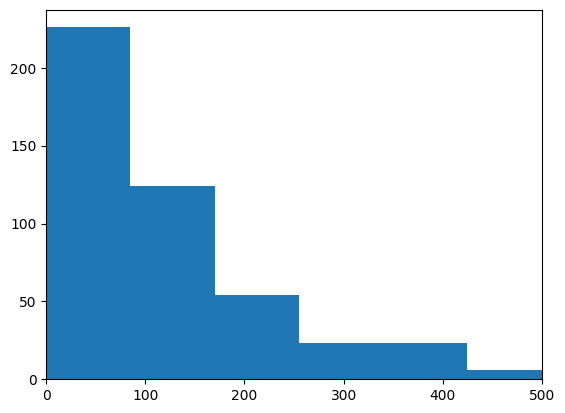

In [16]:
import matplotlib.pyplot as plt
plt.hist(metric_res["mins"], bins=1000)
plt.xlim([0,500])

In [17]:
import numpy as np
min_arr = np.array(metric_res["mins"])
print("Identical records: ", np.sum(min_arr==0), "of", len(min_arr))

Identical records:  10 of 500


In [22]:
## How many duplicates in one generated dataset?
ndr = NonDuplicateRate(dp, n_samples=500)

In [23]:
ndr("adult", "great")

{'non_dup_rate': 0.9}